In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import accuracy_score, roc_auc_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
import seaborn as sns

## Données du demandeur de prêt 

Colonnes

* Loan_ID
* Gender
* Married
* Dependents: 1, 2, 2+
* Education: Graduate, non Graduate
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History: 0, 1
* Property_Area: Urban, Suburban, Rural

Cible:
* Loan_Status

In [10]:
df_loan = pd.read_csv('./dataset/Dataset_4_loan.csv', sep="|")

In [11]:
def replace_element(df,param1, param2, param3):
    for x in df[param1]:
        for y in  df.index:
            if  df[param1][y] == param2 :
                df[param1][y] = 0
            elif df[param1][y] == param3:
                df[param1][y] = 1
            elif df[param1][y] == 'None':
                df[param1][y] = np.nan    
            elif df[param1][y] == 'hello':
                df[param1][y] = np.nan
            elif df[param1][y] == 'ù*ùfsfsf///':
                df[param1][y] = np.nan

In [12]:
def show_missing_value(df):   # reporte le nombre de valeurs manquantes pour chaque colonne
    for col in df.columns:
        missing_series = df[col][df[col].isna() == True]
        if missing_series.size > 0:
            print(col, missing_series.size)
        plt.show()

In [13]:
def remove_element(df,cln, value):
    df.drop(df.index[df[cln] == value], inplace=True)
    df[cln].unique()

In [14]:
# Remplace N
def ReplaceNanByAverage(df,cln):
    df[cln].fillna(df[cln].mean(),inplace=True)
    df_loan

In [15]:
def transform(df, cln):
    df[cln] = df[cln].apply(lambda x: float(x))
    return df

In [17]:
# Suppression des colonnes aberrantes du dataset
df_loan = df_loan.drop(df_loan.iloc[:,0:12],1)

In [20]:
# Compte cellules non NA pour chaque colonne
df_loan.count(axis=0)

Loan_ID              981
Gender               960
Married              930
Dependents           906
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
Loan_Status          614
dtype: int64

In [23]:
# Suppression des lignes abérantes dans la colonne Loan_ID
remove_element(df_loan,'Loan_ID', "-400")

In [26]:
# Aperçu du dataset
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,None,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,966.000000,966.000000,940.000000,946.000000,889.000000
mean,5189.276398,1576.132422,142.596809,342.046512,0.834646
std,5719.486102,2666.684650,77.502016,65.027971,0.371709
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2883.750000,0.000000,100.000000,360.000000,1.000000
50%,3804.000000,1083.000000,126.000000,360.000000,1.000000
75%,5514.250000,2359.500000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [32]:
# Replace Self employe by No : 0 & Yes : 1
replace_element(df_loan, 'Self_Employed', 'No', 'Yes')

<ipython-input-11-388389062f5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 0
<ipython-input-11-388389062f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 1


In [33]:
replace_element(df_loan, 'Married', 'No', 'Yes')

<ipython-input-11-388389062f5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 0
<ipython-input-11-388389062f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 1
<ipython-input-11-388389062f5c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = np.nan
<ipython-input-11-388389062f5c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [34]:
replace_element(df_loan, 'Gender', 'Male', 'Female')

<ipython-input-11-388389062f5c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = np.nan
<ipython-input-11-388389062f5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 0
<ipython-input-11-388389062f5c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = np.nan
<ipython-input-11-388389062f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [35]:
replace_element(df_loan, 'Education', 'Not Graduate', 'Graduate')

<ipython-input-11-388389062f5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 1
<ipython-input-11-388389062f5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param1][y] = 0


In [51]:
desciptive_df = df_loan.copy()
desciptive_df.Gender = desciptive_df.Gender.apply(lambda x: 'Female' if x ==1 else 'Male')
desciptive_df.Self_Employed = desciptive_df.Self_Employed.apply(lambda x: 'Yes' if x ==1 else 'No')
desciptive_df.Married = desciptive_df.Married.apply(lambda x: 'Yes' if x ==1 else 'No')
desciptive_df.Education = desciptive_df.Education.apply(lambda x: 'Graduate' if x ==1 else 'Not Graduate')

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-pack

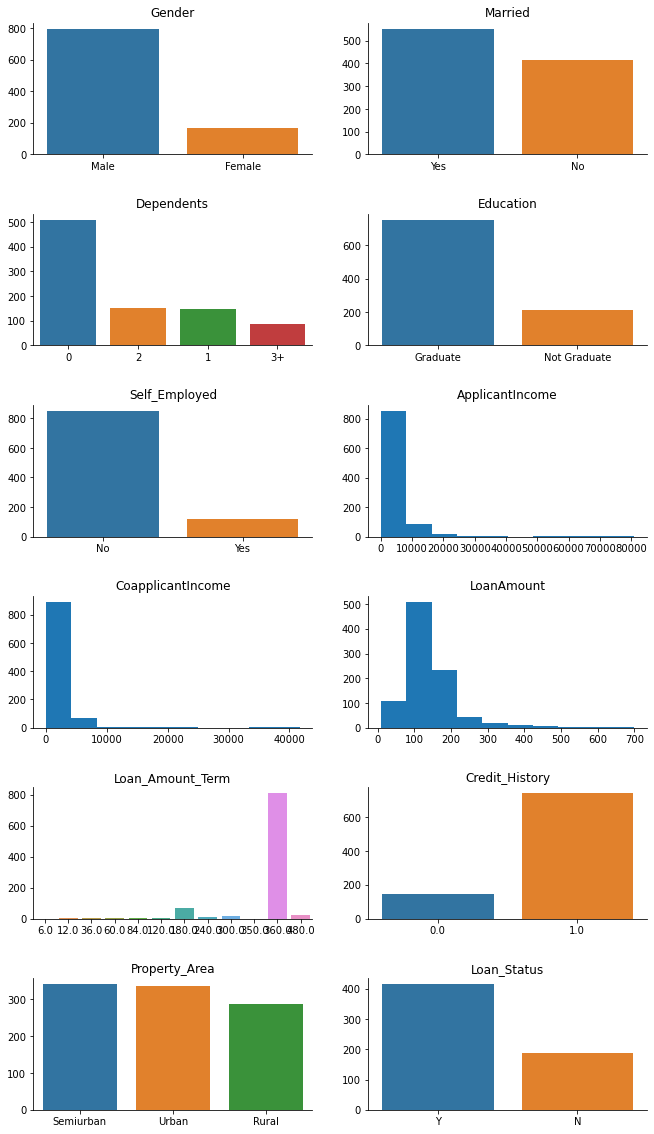

In [52]:
# Presentation graphique des données avant preparation
i, j = 0, 0
f, axes = plt.subplots(6, 2, figsize = (11, 20))
plt.subplots_adjust(hspace = .45)

for col in desciptive_df.columns[1:]:
    if col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
        axes[i,j].hist(df_loan[col].dropna())
    else:
        bar_data = desciptive_df[col].value_counts()
        sns.barplot(bar_data.index, bar_data.values, ax = axes[i,j])
    axes[i, j].set_title(col)
    axes[i, j].spines['top'].set_visible(False)
    axes[i, j].spines['right'].set_visible(False)
    j += 1 
    if j ==2:
        i += 1
        j = 0

In [53]:
# Trions les demandeur par revenue
desciptive_df[desciptive_df['ApplicantIncome'] > 20000].sort_values(by='ApplicantIncome')

# Tous les candidats ayant un revenu supérieur à 20 000 ont un niveau de scolarité plus élevé

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
284,LP001922,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural,N
506,LP002624,Male,No,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
886,LP002485,Male,No,1,Graduate,No,24797,0.0,240.0,360.0,1.0,Semiurban,NaN
893,LP002553,Male,No,0,Graduate,No,29167,0.0,185.0,360.0,1.0,Semiurban,NaN
757,LP001791,Male,Yes,0,Graduate,Yes,32000,0.0,550.0,360.0,NaN,Semiurban,NaN
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [57]:
# desciptive_df = desciptive_df.drop(409)

In [54]:
# La dernière ligne semble contenir des donnnées erronées 
# le demandeur à un salaire ayant trois zero, son histoirique de credit à 0 et l'etat du pret a ete refuser 
# Suppression de la ligne 409
df_loan = df_loan.drop(409)

In [58]:
le = LabelEncoder()
# 0 = Rural 1 = SemiUrban 2 = Urban
df_loan['Property_Area'] = le.fit_transform(df_loan['Property_Area'])
# Transformation de la colonne Dependents
df_loan['Dependents'] = le.fit_transform(df_loan['Dependents'])

In [60]:
# One hot encoding sur la colone ProperyArea
dfDummies = pd.get_dummies(df_loan['Property_Area'], prefix = 'category')
dfDummies

,category_0,category_1,category_2
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
976,0,0,1
977,0,0,1
978,0,1,0
979,1,0,0


In [61]:
# Conctenation du dataframe avec la matrice
df_loan_property = pd.concat([df_loan, dfDummies], axis=1)
df_loan_property

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,category_0,category_1,category_2
0,LP001002,NaN,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,Y,0,0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N,1,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y,0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y,0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,0,1,3,0,1,4009,1777.0,113.0,360.0,1.0,2,NaN,0,0,1
977,LP002975,0,1,0,1,0,4158,709.0,115.0,360.0,1.0,2,NaN,0,0,1
978,LP002980,0,0,0,1,0,3250,1993.0,126.0,360.0,NaN,1,NaN,0,1,0
979,LP002986,0,1,0,1,0,5000,2393.0,158.0,360.0,1.0,0,NaN,1,0,0


In [59]:
# df_loan[df_loan['LoanAmount'] > 400].sort_values(by='ApplicantIncome')

In [63]:
df_loan['Gender']=df_loan['Gender'].apply(lambda x: float(x))
df_loan['Married']=df_loan['Married'].apply(lambda x: float(x))
df_loan['Education']=df_loan['Education'].apply(lambda x: float(x))
df_loan['Self_Employed']=df_loan['Self_Employed'].apply(lambda x: float(x))
df_loan['Dependents']=df_loan['Dependents'].apply(lambda x: float(x))

In [64]:
df_train_data = df_loan
categ_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 
              'Credit_History']
for col in categ_cols:
    df_train_data[col] = df_train_data[col].fillna(df_train_data[col].mode()[0])


In [65]:
nan_rows = df_train_data[df_train_data['Loan_Status'].isnull()]

df_loan_train = df_loan.iloc[:603, :] 
df_loan_predict = df_loan.iloc[603:, :]

In [66]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.0,1.0,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,0.0,1.0,1.0,1.0,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,0.0,1.0,0.0,1.0,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,0.0,1.0,0.0,0.0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,0.0,0.0,0.0,1.0,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,0.0,1.0,3.0,0.0,1.0,4009,1777.0,113.0,360.0,1.0,2,NaN
977,LP002975,0.0,1.0,0.0,1.0,0.0,4158,709.0,115.0,360.0,1.0,2,NaN
978,LP002980,0.0,0.0,0.0,1.0,0.0,3250,1993.0,126.0,360.0,1.0,1,NaN
979,LP002986,0.0,1.0,0.0,1.0,0.0,5000,2393.0,158.0,360.0,1.0,0,NaN


In [67]:
le = LabelEncoder()
df_loan_train['Property_Area'] = le.fit_transform(df_loan_train['Property_Area'])
df_loan_predict['Property_Area'] = le.fit_transform(df_loan_predict['Property_Area'])
df_loan_train.dropna(axis=0)
df_loan_predict

<ipython-input-67-a483f19e675c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_train['Property_Area'] = le.fit_transform(df_loan_train['Property_Area'])
<ipython-input-67-a483f19e675c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_predict['Property_Area'] = le.fit_transform(df_loan_predict['Property_Area'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
615,LP001022,0.0,1.0,1.0,1.0,0.0,3076,1500.0,126.0,360.0,1.0,2,NaN
616,LP001031,0.0,1.0,2.0,1.0,0.0,5000,1800.0,208.0,360.0,1.0,2,NaN
617,LP001035,0.0,1.0,2.0,1.0,0.0,2340,2546.0,100.0,360.0,1.0,2,NaN
618,LP001051,0.0,0.0,0.0,0.0,0.0,3276,0.0,78.0,360.0,1.0,2,NaN
619,LP001054,0.0,1.0,0.0,0.0,1.0,2165,3422.0,152.0,360.0,1.0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,0.0,1.0,3.0,0.0,1.0,4009,1777.0,113.0,360.0,1.0,2,NaN
977,LP002975,0.0,1.0,0.0,1.0,0.0,4158,709.0,115.0,360.0,1.0,2,NaN
978,LP002980,0.0,0.0,0.0,1.0,0.0,3250,1993.0,126.0,360.0,1.0,1,NaN
979,LP002986,0.0,1.0,0.0,1.0,0.0,5000,2393.0,158.0,360.0,1.0,0,NaN


In [68]:
# Colonnes X data
X = df_loan_train.iloc[:, 1:12].values
y = df_loan_train.iloc[:, 12].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
# Replacer les NA par la moyenne sur LoanAmount
df_loan_predict['LoanAmount'].fillna(df_loan_predict['LoanAmount'].median())
df_loan_predict.tail(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
931,LP002774,0.0,1.0,0.0,0.0,0.0,1700,2900.0,67.0,360.0,0.0,2,NaN
932,LP002775,0.0,0.0,0.0,0.0,0.0,4768,0.0,125.0,360.0,1.0,0,NaN
933,LP002781,0.0,0.0,0.0,1.0,0.0,3083,2738.0,120.0,360.0,1.0,2,NaN
934,LP002782,0.0,1.0,1.0,1.0,0.0,2667,1542.0,148.0,360.0,1.0,0,NaN
935,LP002786,1.0,1.0,0.0,0.0,0.0,1647,1762.0,181.0,360.0,1.0,2,NaN
936,LP002790,0.0,1.0,4.0,1.0,0.0,3400,0.0,80.0,120.0,1.0,2,NaN
937,LP002791,0.0,1.0,1.0,1.0,0.0,16000,5000.0,40.0,360.0,1.0,1,NaN
938,LP002793,0.0,1.0,0.0,1.0,0.0,5333,0.0,90.0,360.0,1.0,0,NaN
939,LP002802,0.0,0.0,0.0,1.0,0.0,2875,2416.0,95.0,6.0,0.0,1,NaN
940,LP002803,0.0,1.0,1.0,0.0,0.0,2600,618.0,122.0,360.0,1.0,1,NaN


In [72]:
# Verification des valeurs manquante dans le dataset
show_missing_value(df_loan_predict)

LoanAmount 5
Loan_Status 362


In [77]:
# Calcul de la correlation sur nos données d'entrainement
df_loan_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,-0.351893,-0.108801,0.040815,-0.000809,-0.068394,-0.068539,-0.120894,0.070572,-0.018890,0.020888
Married,-0.351893,1.000000,0.212359,-0.009600,-0.003423,0.041123,0.133280,0.157616,-0.129527,-0.001467,0.015494
Dependents,-0.108801,0.212359,1.000000,-0.048464,0.040510,0.053078,0.010631,0.081625,-0.084440,-0.064209,0.025842
Education,0.040815,-0.009600,-0.048464,1.000000,0.026714,0.160569,0.060348,0.180024,0.086989,0.080281,0.062252
Self_Employed,-0.000809,-0.003423,0.040510,0.026714,1.000000,0.149613,-0.008027,0.115549,-0.036570,-0.004501,-0.032136
ApplicantIncome,-0.068394,0.041123,0.053078,0.160569,0.149613,1.000000,-0.119115,0.605273,-0.066170,0.036024,0.021463
CoapplicantIncome,-0.068539,0.133280,0.010631,0.060348,-0.008027,-0.119115,1.000000,0.202431,-0.067891,0.002653,0.010916
LoanAmount,-0.120894,0.157616,0.081625,0.180024,0.115549,0.605273,0.202431,1.000000,0.024976,0.008152,-0.041524
Loan_Amount_Term,0.070572,-0.129527,-0.084440,0.086989,-0.036570,-0.066170,-0.067891,0.024976,1.000000,-0.004298,-0.069177
Credit_History,-0.018890,-0.001467,-0.064209,0.080281,-0.004501,0.036024,0.002653,0.008152,-0.004298,1.000000,-0.002963


<AxesSubplot:>

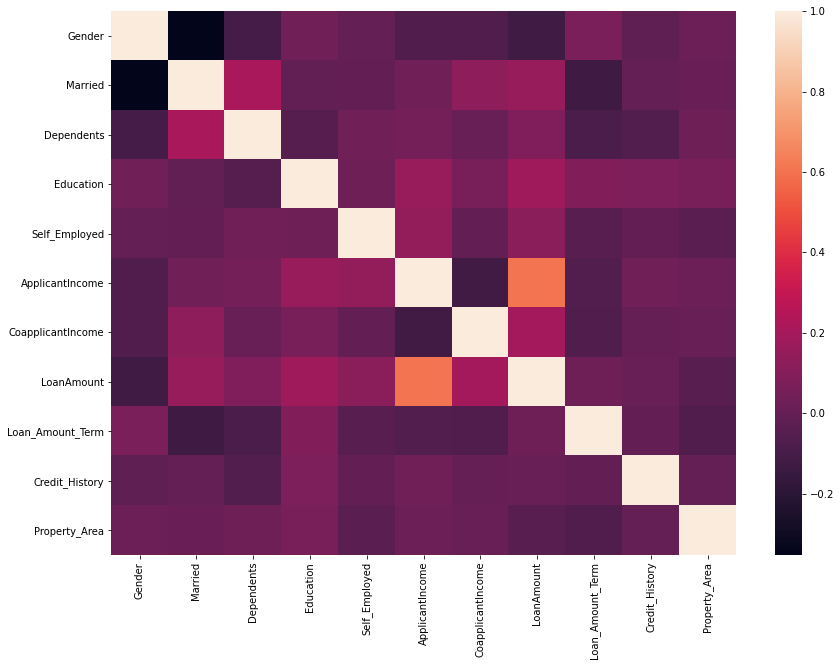

In [82]:
f = plt.subplots(1, 1, figsize = (14,10))
corr = df_loan_train.corr()
sns.heatmap(corr)

In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)

In [79]:
# Apply random forest model
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
RF.predict(X_train)
print("Score random forest : ", round(RF.score(X_train,y_train), 4))

0.8112

In [80]:
df_loan_predict = df_loan_predict.fillna(df_loan_predict.mean())
X_predict = df_loan_predict.iloc[:, 1:12].values

pd_results = pd.DataFrame(RF.predict(X_predict), index = df_loan_predict.Loan_ID, columns = ['Loan_Status'])
pd_results.Loan_Status = pd_results.Loan_Status.apply(lambda x: 'Y' if x ==1 else 'N')
pd_results.to_csv('results.csv')

In [81]:
df_loan_result = pd.read_csv('results.csv', sep=",")

df_loan_result

,Loan_ID,Loan_Status
0,LP001022,N
1,LP001031,N
2,LP001035,N
3,LP001051,N
4,LP001054,N
...,...,...
357,LP002971,N
358,LP002975,N
359,LP002980,N
360,LP002986,N
